In [134]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [135]:
filePath = 'C:\\Users\\Sanchita\\Desktop\\Stuff\\ACN Project Re\\theUltimateCSV1.csv'
data = pd.read_csv(filePath, header=None, names=['nodeName', 'hitRatio', 'distFromProducer', 'distFromConsumers', 'NumberOfNodes', 'cacheSize', 'interestRate','totalLevels','level'])

In [136]:
data.head()

,nodeName,hitRatio,distFromProducer,distFromConsumers,NumberOfNodes,cacheSize,interestRate,totalLevels,level
0,root,0.495050,0,4,15,130,300,4,0
1,l1-1,0.957634,1,3,15,130,300,4,1
2,l1-2,0.913305,1,3,15,130,300,4,1
3,l2-1,0.506275,2,2,15,60,300,4,2
4,l2-2,0.499752,2,2,15,60,300,4,2


In [137]:
data.corr()

,hitRatio,distFromProducer,distFromConsumers,NumberOfNodes,cacheSize,interestRate,totalLevels,level
hitRatio,1.000000,0.483877,-0.559735,0.089182,-0.451821,0.068529,0.054850,0.483877
distFromProducer,0.483877,1.000000,-0.749374,0.605407,-0.507697,0.155909,0.603806,1.000000
distFromConsumers,-0.559735,-0.749374,1.000000,0.064000,0.763556,-0.000138,0.075342,-0.749374
NumberOfNodes,0.089182,0.605407,0.064000,1.000000,0.143165,0.280283,0.988757,0.605407
cacheSize,-0.451821,-0.507697,0.763556,0.143165,1.000000,0.030517,0.154650,-0.507697
interestRate,0.068529,0.155909,-0.000138,0.280283,0.030517,1.000000,0.234623,0.155909
totalLevels,0.054850,0.603806,0.075342,0.988757,0.154650,0.234623,1.000000,0.603806
level,0.483877,1.000000,-0.749374,0.605407,-0.507697,0.155909,0.603806,1.000000


In [138]:
# colAdd = []
# for ind in data.index:
#     if(data['nodeName'][ind] == 'root'):
#         colAdd.append(0)
#     else:
#         tmp = data['nodeName'][ind]
#         colAdd.append(int(tmp[1:2]))
# colAdd
# data['level'] = colAdd
# data.head()


In [139]:
# data.to_csv(filePath, index=False, header=None)

In [140]:
# print(data.columns)
# print(data['level'].unique())

In [141]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,hitRatio,distFromProducer,distFromConsumers,NumberOfNodes,cacheSize,interestRate,totalLevels,level
hitRatio,1,0.483877,-0.559735,0.0891821,-0.451821,0.068529,0.0548498,0.483877
distFromProducer,0.483877,1,-0.749374,0.605407,-0.507697,0.155909,0.603806,1
distFromConsumers,-0.559735,-0.749374,1,0.064,0.763556,-0.000138197,0.0753425,-0.749374
NumberOfNodes,0.0891821,0.605407,0.064,1,0.143165,0.280283,0.988757,0.605407
cacheSize,-0.451821,-0.507697,0.763556,0.143165,1,0.0305174,0.15465,-0.507697
interestRate,0.068529,0.155909,-0.000138197,0.280283,0.0305174,1,0.234623,0.155909
totalLevels,0.0548498,0.603806,0.0753425,0.988757,0.15465,0.234623,1,0.603806
level,0.483877,1,-0.749374,0.605407,-0.507697,0.155909,0.603806,1


In [142]:
def getAccuracy(val_y, preds):
    accuracy = mean_absolute_error(val_y, preds)
    return accuracy

In [143]:
def plotGenerator(df,level,IR, NoOfLevels):
    filteredDf = df[df['nodeName'].str.contains(level)]
    plt.plot(filteredDf['cacheSize'],filteredDf['hitRatio'] ,'bo')
    plt.title('IR =' + str(IR) + 'NumberOfLevels =' + str(NoOfLevels) + 'Level='+level)
    plt.xlabel('Cache Size')
    plt.ylabel('Hit Ratio')
    plt.grid(linestyle='-', linewidth=1)
    print(filteredDf['cacheSize'].min())
    print(filteredDf['cacheSize'].max())
    print(filteredDf['hitRatio'].max())

Various number of nodes used =  [15 31 63]
Interest rates used =  [ 300  500  700 1000]


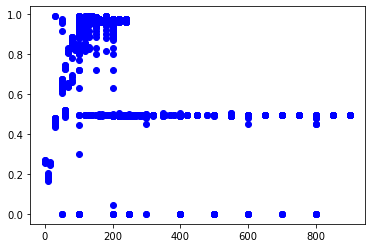

In [144]:
plt.plot(data['cacheSize'],data['hitRatio'] ,'bo') 
print("Various number of nodes used = ",data.NumberOfNodes.unique())
print("Interest rates used = ",data.interestRate.unique())


In [145]:
data.columns

Index(['nodeName', 'hitRatio', 'distFromProducer', 'distFromConsumers',
       'NumberOfNodes', 'cacheSize', 'interestRate', 'totalLevels', 'level'],
      dtype='object')

In [146]:
dfIR300 = data[data['interestRate'] == 300]
dfIR300N15 = dfIR300[dfIR300['NumberOfNodes'] == 15]
dfIR300N15.head()

,nodeName,hitRatio,distFromProducer,distFromConsumers,NumberOfNodes,cacheSize,interestRate,totalLevels,level
0,root,0.495050,0,4,15,130,300,4,0
1,l1-1,0.957634,1,3,15,130,300,4,1
2,l1-2,0.913305,1,3,15,130,300,4,1
3,l2-1,0.506275,2,2,15,60,300,4,2
4,l2-2,0.499752,2,2,15,60,300,4,2


# IR300N15

100
750
0.495049505


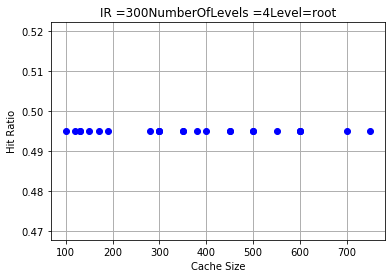

In [147]:
plotGenerator(dfIR300N15,'root',300, 4)

100
750
0.964018525


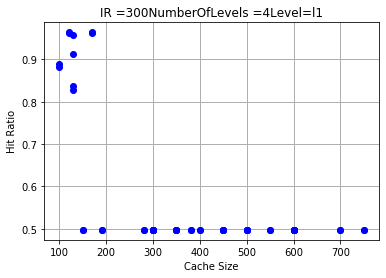

In [148]:
plotGenerator(dfIR300N15,'l1',300, 4)

60
500
0.946018172


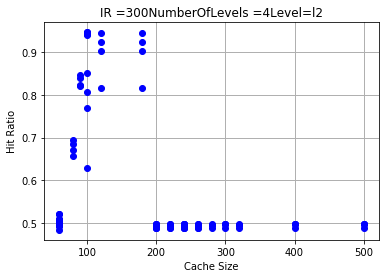

In [149]:
plotGenerator(dfIR300N15,'l2',300, 4)


30
240
0.988834844


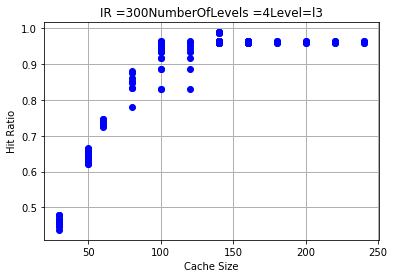

In [150]:
plotGenerator(dfIR300N15,'l3',300, 4)


# IR500N15

In [151]:
dfIR500 = data[data['interestRate'] == 500]
dfIR500N15 = dfIR500[dfIR500['NumberOfNodes'] == 15]
dfIR500N15.head()

,nodeName,hitRatio,distFromProducer,distFromConsumers,NumberOfNodes,cacheSize,interestRate,totalLevels,level
45,root,0.495050,0,4,15,130,500,4,0
46,l1-1,0.974083,1,3,15,130,500,4,1
47,l1-2,0.945553,1,3,15,130,500,4,1
48,l2-1,0.509075,2,2,15,60,500,4,2
49,l2-2,0.502075,2,2,15,60,500,4,2


120
750
0.495049505


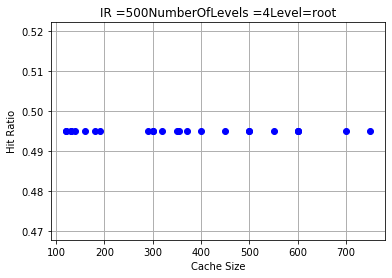

In [152]:
plotGenerator(dfIR500N15,'root',500, 4)


30
750
0.989236999


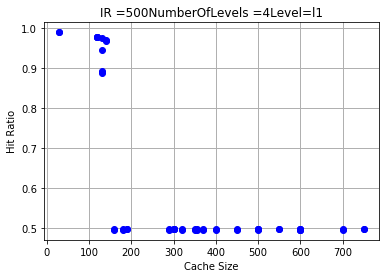

In [153]:
plotGenerator(dfIR500N15,'l1',500, 4)


15
500
0.966666667


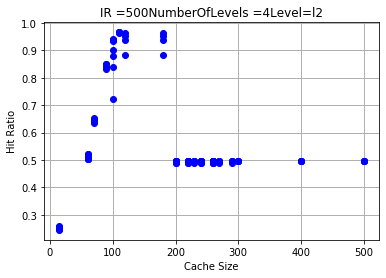

In [154]:
plotGenerator(dfIR500N15,'l2',500, 4)


2
240
0.977592267


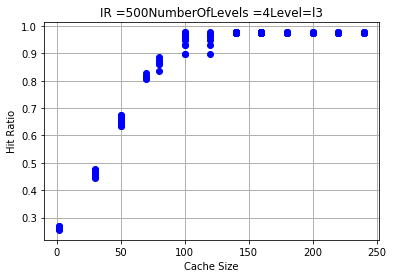

In [155]:
plotGenerator(dfIR500N15,'l3',500, 4)


# IR700

In [156]:
dfIRN15 = data[data['interestRate'] == 700]
dfIRN15.head()

,nodeName,hitRatio,distFromProducer,distFromConsumers,NumberOfNodes,cacheSize,interestRate,totalLevels,level
852,root,0.495050,0,6,63,420,700,6,0
853,l1-1,0.497512,1,5,63,420,700,6,1
854,l1-2,0.497512,1,5,63,420,700,6,1
855,l2-1,0.497512,2,4,63,320,700,6,2
856,l2-2,0.497512,2,4,63,320,700,6,2


420
900
0.495049505


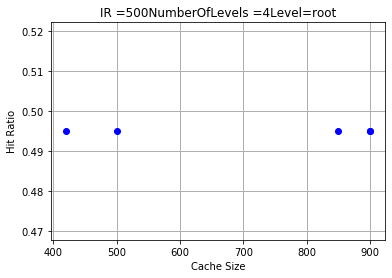

In [157]:
plotGenerator(dfIRN15,'root',500, 4)


420
900
0.497512438


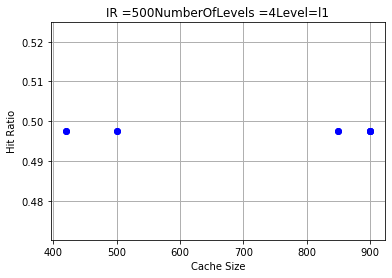

In [158]:
plotGenerator(dfIRN15,'l1',500, 4)


320
850
0.497512438


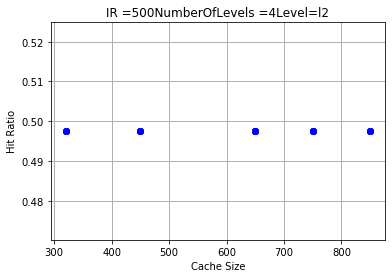

In [159]:
plotGenerator(dfIRN15,'l2',500, 4)


220
550
0.5049019610000001


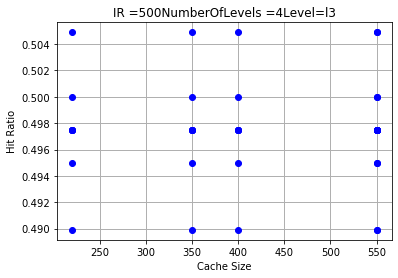

In [160]:
plotGenerator(dfIRN15,'l3',500, 4)


# Testing for all levels color coded interest! hehehe :)

In [161]:
def scatterplot(label, x, y, category):
  fig, ax = plt.subplots(figsize=(10, 5))
  #applies the custom color map along with the color sequence
  ax.scatter(x, y, alpha=0.70, c= category, cmap=cm.brg)
#   categories = category.apply(lambda x: '' if x == 0 else 'weekend')
  #adds a title and axes labels
  ax.set_title(label)
  ax.set_xlabel('Cache size')
  ax.set_ylabel('Hit ratio')
  ax.legend(category.unique())
  #removing top and right borders
  #adds major gridlines
  ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

0.495049505


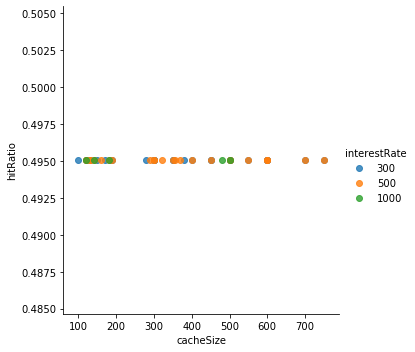

In [162]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns

dfIRN15 = data[data['NumberOfNodes'] == 15]
dfIRN15Root = dfIRN15[dfIRN15['nodeName'].str.contains('root')]
print(dfIRN15Root['hitRatio'].max())
# scatterplot('For 15 nodes root all interest', dfIRN15['cacheSize'],dfIRN15['hitRatio'],dfIRN15['interestRate'])
sns.lmplot("cacheSize", "hitRatio", data=dfIRN15Root, hue="interestRate", fit_reg=False)

0.989236999


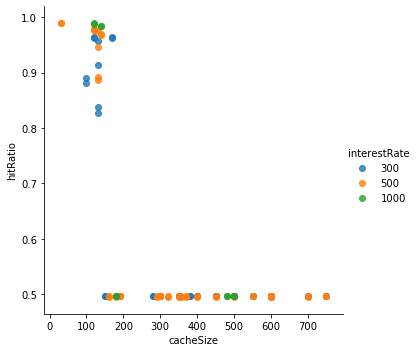

In [163]:
dfIRN15 = data[data['NumberOfNodes'] == 15]
dfIRN15L1 = dfIRN15[dfIRN15['nodeName'].str.contains('l1')]
print(dfIRN15L1['hitRatio'].max())
# scatterplot('For 15 nodes root all interest', dfIRN15['cacheSize'],dfIRN15['hitRatio'],dfIRN15['interestRate'])
sns.lmplot("cacheSize", "hitRatio", data=dfIRN15L1, hue="interestRate", fit_reg=False)

0.966666667


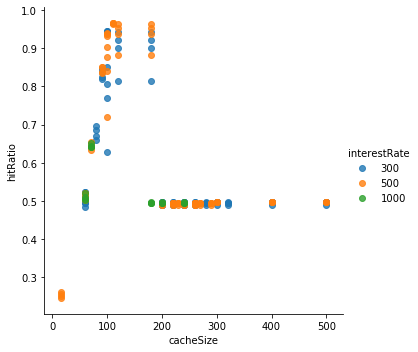

In [164]:
dfIRN15 = data[data['NumberOfNodes'] == 15]
dfIRN15L2 = dfIRN15[dfIRN15['nodeName'].str.contains('l2')]
print(dfIRN15L2['hitRatio'].max())
# scatterplot('For 15 nodes root all interest', dfIRN15['cacheSize'],dfIRN15['hitRatio'],dfIRN15['interestRate'])
sns.lmplot("cacheSize", "hitRatio", data=dfIRN15L2, hue="interestRate", fit_reg=False)

0.988834844


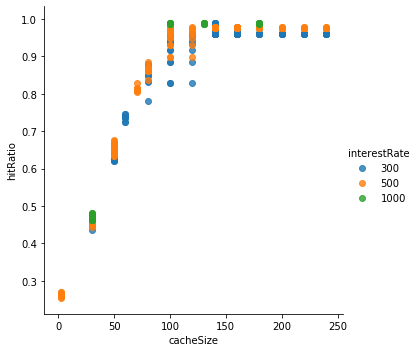

In [165]:
dfIRN15 = data[data['NumberOfNodes'] == 15]
dfIRN15L3 = dfIRN15[dfIRN15['nodeName'].str.contains('l3')]
print(dfIRN15L3['hitRatio'].max())
# scatterplot('For 15 nodes root all interest', dfIRN15['cacheSize'],dfIRN15['hitRatio'],dfIRN15['interestRate'])
sns.lmplot("cacheSize", "hitRatio", data=dfIRN15L3, hue="interestRate", fit_reg=False)

0.97748551


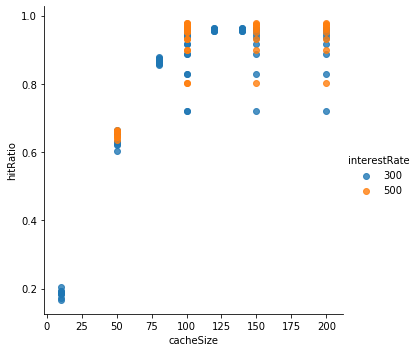

In [166]:
dfIRN15 = data[data['NumberOfNodes'] == 31]
dfIRN15L3 = dfIRN15[dfIRN15['nodeName'].str.contains('l4')]
print(dfIRN15L3['hitRatio'].max())
# scatterplot('For 15 nodes root all interest', dfIRN15['cacheSize'],dfIRN15['hitRatio'],dfIRN15['interestRate'])
sns.lmplot("cacheSize", "hitRatio", data=dfIRN15L3, hue="interestRate", fit_reg=False)

# Graphs based on levels

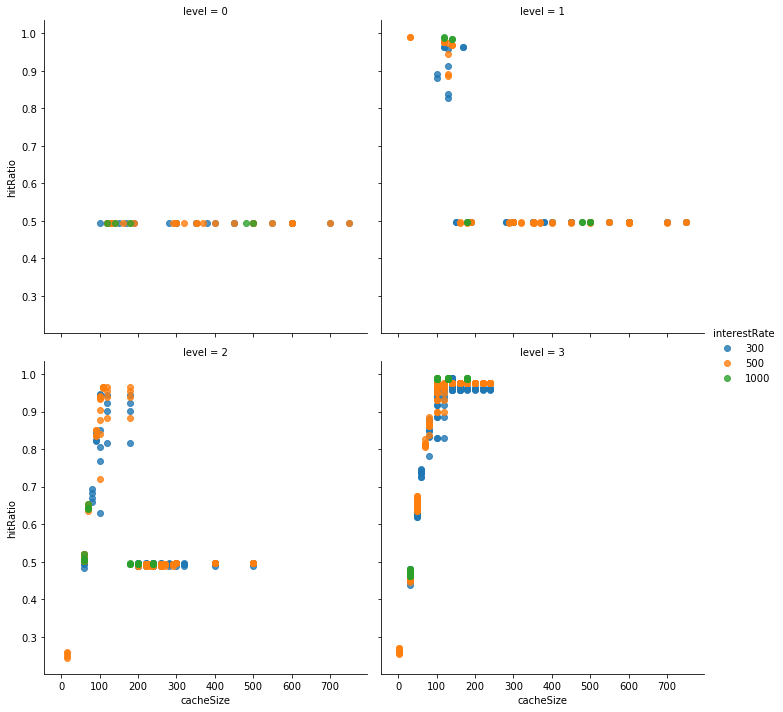

In [167]:
dfIRN15 = data[data['NumberOfNodes'] == 15]
# dataRoot.head()
sns.lmplot("cacheSize", "hitRatio", data=dfIRN15, hue="interestRate",col='level',col_wrap=2, fit_reg=False)

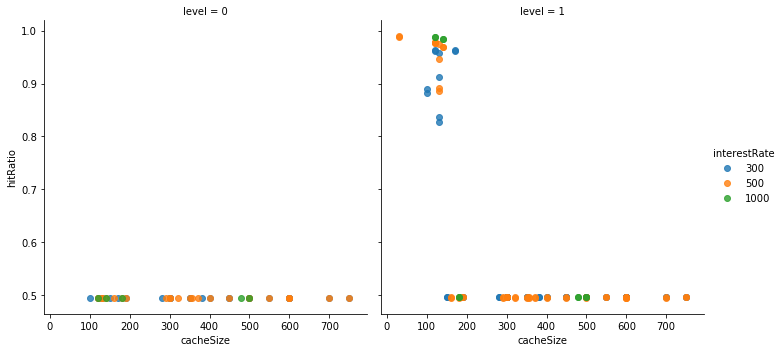

In [168]:
dfIRN15 = data[data['NumberOfNodes'] == 15]
dfIRN15 = dfIRN15[dfIRN15['level'] < 2]
sns.lmplot("cacheSize", "hitRatio", data=dfIRN15, hue="interestRate",col='level',col_wrap=2, fit_reg=False)

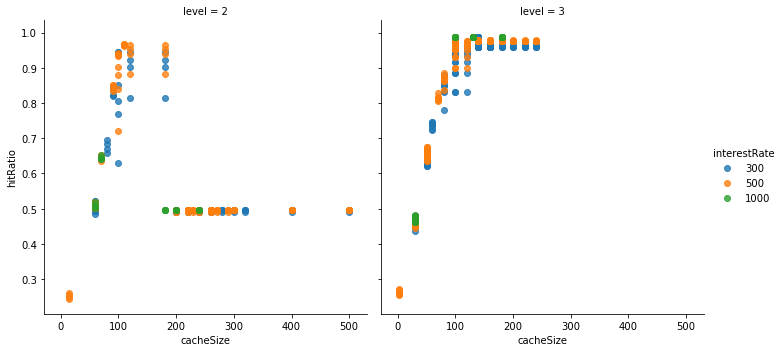

In [169]:
dfIRN15 = data[data['NumberOfNodes'] == 15]
dfIRN15 = dfIRN15[dfIRN15['level'] > 1]
sns.lmplot("cacheSize", "hitRatio", data=dfIRN15, hue="interestRate",col='level',col_wrap=2, fit_reg=False)

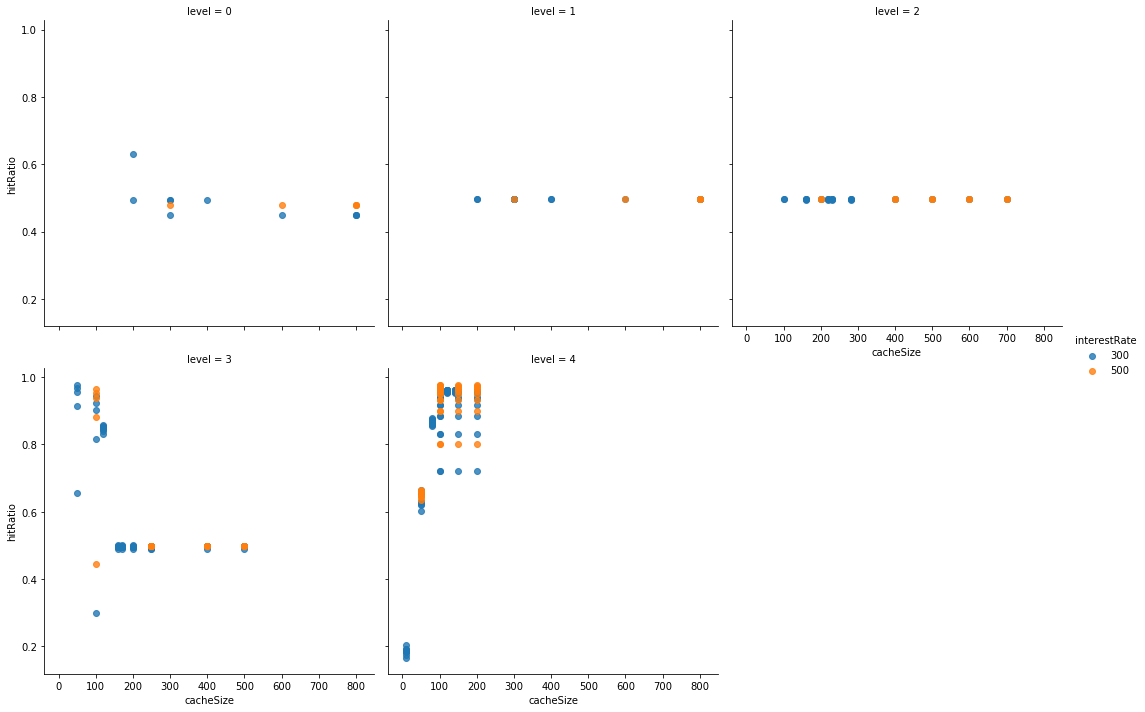

In [170]:
dfIRN31 = data[data['NumberOfNodes'] == 31]
dfIRN31 = dfIRN31[dfIRN31['hitRatio'] > 0.15]
sns.lmplot("cacheSize", "hitRatio", data=dfIRN31, hue="interestRate",col='level',col_wrap=3,fit_reg=False)

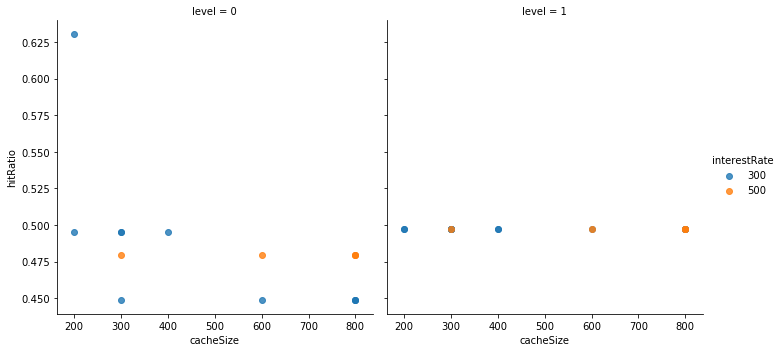

In [171]:
dfIRN31 = data[data['NumberOfNodes'] == 31]
dfIRN31 = dfIRN31[(dfIRN31['hitRatio'] > 0.15) & (dfIRN31['level'] < 2)]
sns.lmplot("cacheSize", "hitRatio", data=dfIRN31, hue="interestRate",col='level',col_wrap=2,fit_reg=False)

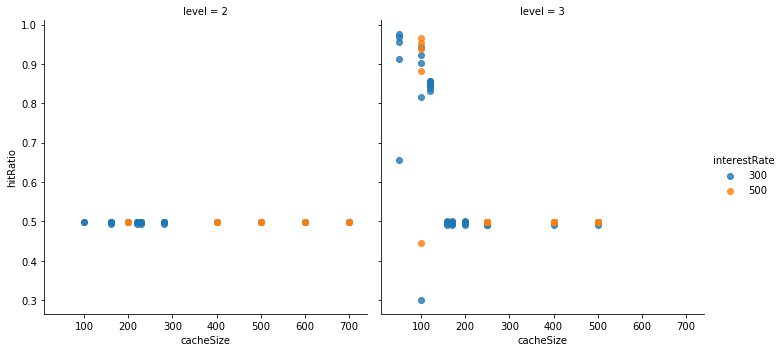

In [180]:
dfIRN31 = data[data['NumberOfNodes'] == 31]
dfIRN31 = dfIRN31[(dfIRN31['hitRatio'] > 0.15) & (dfIRN31['level'] > 1) & (dfIRN31['level'] < 4)]
sns.lmplot("cacheSize", "hitRatio", data=dfIRN31, hue="interestRate",col='level',col_wrap=2,fit_reg=False)

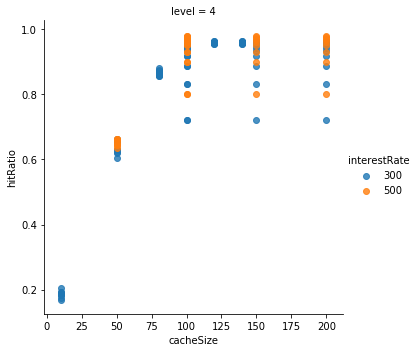

In [173]:
dfIRN31 = data[data['NumberOfNodes'] == 31]
dfIRN31 = dfIRN31[(dfIRN31['hitRatio'] > 0.15) & (dfIRN31['level'] > 3)]
sns.lmplot("cacheSize", "hitRatio", data=dfIRN31, hue="interestRate",col='level',col_wrap=1,fit_reg=False)

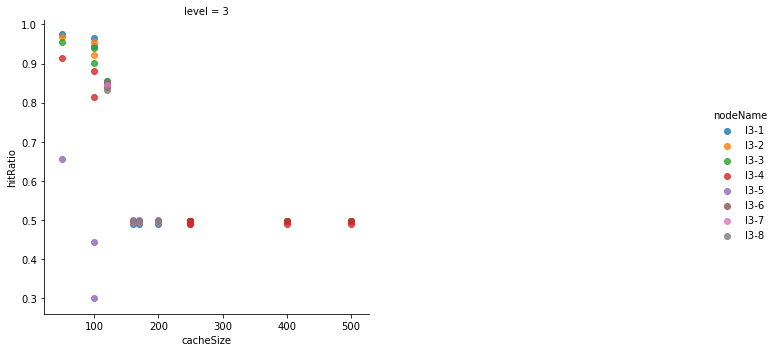

In [181]:
dfIRN31 = data[data['NumberOfNodes'] == 31]
dfIRN31 = dfIRN31[(dfIRN31['hitRatio'] > 0.15) & (dfIRN31['level'] == 3)]
sns.lmplot("cacheSize", "hitRatio", data=dfIRN31, hue="nodeName",col='level',col_wrap=2,fit_reg=False)

# Trying to get the best data

In [174]:
tmp = data[data['nodeName'].str.contains('l3')]
tmp1 = tmp[tmp['cacheSize'] > 100]
# tmp1 = tmp1[tmp1['hitRatio'] > 0.7]

tmp = data[data['nodeName'].str.contains('l2')]
tmp2 = tmp[tmp['cacheSize'] < 200]
tmp2 = tmp2[tmp2['cacheSize'] > 100]
# tmp2 = tmp2[tmp2['hitRatio'] > 0.7]
print(len(tmp2))

tmp = data[data['nodeName'].str.contains('l1')]
tmp3 = tmp[tmp['cacheSize'] < 180]
# tmp3 = tmp3[tmp3['hitRatio'] > 0.7]

tmp = data[data['nodeName'].str.contains('l4')]
tmp4 = tmp[tmp['cacheSize'] > 100]
# tmp4 = tmp4[tmp4['hitRatio'] > 0.7]

print(len(tmp3))

28
30


In [175]:
final = pd.concat([tmp1,tmp2,tmp3], axis=0)
# print(final.head())
# len(final)

In [176]:
corr = final.corr()
corr.style.background_gradient(cmap='coolwarm')

,hitRatio,distFromProducer,distFromConsumers,NumberOfNodes,cacheSize,interestRate,totalLevels,level
hitRatio,1,-0.140913,-0.610072,-0.64914,-0.645428,-0.00784278,-0.742576,-0.140913
distFromProducer,-0.140913,1,-0.405952,0.223889,0.267525,-0.0696758,0.241224,1
distFromConsumers,-0.610072,-0.405952,1,0.785837,0.563568,0.17911,0.788981,-0.405952
NumberOfNodes,-0.64914,0.223889,0.785837,1,0.771895,0.193549,0.985007,0.223889
cacheSize,-0.645428,0.267525,0.563568,0.771895,1,0.182693,0.778314,0.267525
interestRate,-0.00784278,-0.0696758,0.17911,0.193549,0.182693,1,0.143355,-0.0696758
totalLevels,-0.742576,0.241224,0.788981,0.985007,0.778314,0.143355,1,0.241224
level,-0.140913,1,-0.405952,0.223889,0.267525,-0.0696758,0.241224,1


In [177]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y = final.cacheSize
features = ['distFromConsumers','distFromProducer', 'level']
X = final[features]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
preds = forest_model.predict(val_X)
accuracy = getAccuracy(val_y, preds)
print("Accuracy is {}".format(accuracy))

c:\users\sanchita\miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy is 63.22136597861487


In [178]:
level = [0,1,2,3,4,5,6,7,8]
levelD = level.copy()
level.sort(reverse=True)
testing = pd.DataFrame({'level': levelD, 'distFromProducer': levelD, 'distFromConsumer': level})
preds = forest_model.predict(testing)
testing['CacheSize'] = preds
testing

,level,distFromProducer,distFromConsumer,CacheSize
0,0,0,8,164.222536
1,1,1,7,164.222536
2,2,2,6,219.160363
3,3,3,5,435.520588
4,4,4,4,435.520588
5,5,5,3,435.520588
6,6,6,2,325.163499
7,7,7,1,314.827245
8,8,8,0,314.827245
